In [25]:
S0 * np.exp((r-0.5 * s**2)*T)

329.637283643773

In [26]:
S0 * np.exp((r-0.5 * s**2)*T + s * np.sqrt(T))

554.7160484083412

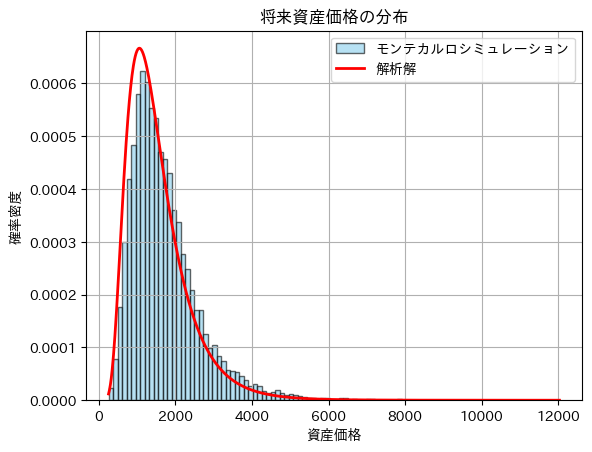


【シミュレーション結果のパーセンタイルによる資産価格】
中央値 (50%): 1526.82
-2σの値 (2.275%): 562.67
-1σの値 (15.865%): 935.99
+1σの値 (84.135%): 2487.73
+2σの値 (97.725%): 4156.55

【解析解による資産価格】
中央値 (50%): 1363.16
-2σの値 (2.275%): 504.59
-1σの値 (15.865%): 829.36
+1σの値 (84.135%): 2240.53
+2σの値 (97.725%): 3682.59

【解析解とシミュレーションの比較】
中央値 (50%): -0.11
-2σの値 (2.275%): -0.10
-1σの値 (15.865%): -0.11
+1σの値 (84.135%): -0.10
+2σの値 (97.725%): -0.11


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import lognorm

# パラメータ設定
S0 = 100       # 初期資産価格
mu = 0.10      # 期待リターン（年率）
sigma = 0.10   # ボラティリティ（年率）
T = 30          # 予測期間（年）
N = 10000      # シミュレーション回数

# 連続複利に変換
s = np.sqrt(np.log(1+(sigma/(1+mu))**2))
r = np.log(1+mu)-(s**2)/2

# モンテカルロシミュレーション
np.random.seed(2)  # 再現性のために乱数シードを設定
Z = np.random.normal(0, 1, N)
ST = S0 * np.exp(r * T + s * np.sqrt(T) * Z)

# 解析解による資産価格の分布
# 対数正規分布のパラメータ
mu_log = np.log(S0) + (r - 0.5 * s**2) * T
sigma_log = s * np.sqrt(T)

# 資産価格の範囲を設定
S_min = np.min(ST)
S_max = np.max(ST)
S_values = np.linspace(S_min, S_max, 1000)

# 対数正規分布のPDFを計算
pdf_values = lognorm.pdf(S_values, s=sigma_log, scale=np.exp(mu_log))

# ヒストグラムの描画
plt.hist(ST, bins=100, density=True, alpha=0.6, color='skyblue', edgecolor='k', label='モンテカルロシミュレーション')

# 解析解のプロット
plt.plot(S_values, pdf_values, 'r', linewidth=2, label='解析解')

plt.title('将来資産価格の分布')
plt.xlabel('資産価格')
plt.ylabel('確率密度')
plt.legend()
plt.grid(True)
plt.show()

# 基本統計量の計算
mean_ST = np.mean(ST)
median_ST = np.median(ST)
std_ST = np.std(ST)

# パーセンタイルの設定（正規分布における標準偏差に対応するパーセンタイル）
percentile_median = 50
percentile_minus_2sigma = 2.275  # -2σに対応するパーセンタイル
percentile_minus_1sigma = 15.865  # -1σに対応するパーセンタイル
percentile_plus_1sigma = 84.135  # +1σに対応するパーセンタイル
percentile_plus_2sigma = 97.725  # +2σに対応するパーセンタイル

# シミュレーション結果からパーセンタイル値を計算
ST_median_percentile = np.percentile(ST, percentile_median)
ST_minus_2sigma_percentile = np.percentile(ST, percentile_minus_2sigma)
ST_minus_1sigma_percentile = np.percentile(ST, percentile_minus_1sigma)
ST_plus_1sigma_percentile = np.percentile(ST, percentile_plus_1sigma)
ST_plus_2sigma_percentile = np.percentile(ST, percentile_plus_2sigma)

print("\n【シミュレーション結果のパーセンタイルによる資産価格】")
print(f"中央値 (50%): {ST_median_percentile:.2f}")
print(f"-2σの値 (2.275%): {ST_minus_2sigma_percentile:.2f}")
print(f"-1σの値 (15.865%): {ST_minus_1sigma_percentile:.2f}")
print(f"+1σの値 (84.135%): {ST_plus_1sigma_percentile:.2f}")
print(f"+2σの値 (97.725%): {ST_plus_2sigma_percentile:.2f}")

# 解析解による資産価格を計算
AN_median_percentile = S0 * np.exp((r-0.5 * s**2)*T)
AN_minus_2sigma_percentile = S0 * np.exp((r-0.5 * s**2)*T -2* s * np.sqrt(T))
AN_minus_1sigma_percentile = S0 * np.exp((r-0.5 * s**2)*T -1* s * np.sqrt(T))
AN_plus_1sigma_percentile = S0 * np.exp((r-0.5 * s**2)*T +1* s * np.sqrt(T))
AN_plus_2sigma_percentile = S0 * np.exp((r-0.5 * s**2)*T +2* s * np.sqrt(T))

print("\n【解析解による資産価格】")
print(f"中央値 (50%): {AN_median_percentile:.2f}")
print(f"-2σの値 (2.275%): {AN_minus_2sigma_percentile:.2f}")
print(f"-1σの値 (15.865%): {AN_minus_1sigma_percentile:.2f}")
print(f"+1σの値 (84.135%): {AN_plus_1sigma_percentile:.2f}")
print(f"+2σの値 (97.725%): {AN_plus_2sigma_percentile:.2f}")

print("\n【解析解とシミュレーションの比較】")
print(f"中央値 (50%): {AN_median_percentile/ST_median_percentile-1:.2f}")
print(f"-2σの値 (2.275%): {AN_minus_2sigma_percentile/ST_minus_2sigma_percentile-1:.2f}")
print(f"-1σの値 (15.865%): {AN_minus_1sigma_percentile/ST_minus_1sigma_percentile-1:.2f}")
print(f"+1σの値 (84.135%): {AN_plus_1sigma_percentile/ST_plus_1sigma_percentile-1:.2f}")
print(f"+2σの値 (97.725%): {AN_plus_2sigma_percentile/ST_plus_2sigma_percentile-1:.2f}")


In [45]:
# パーセンタイルの設定（正規分布における標準偏差に対応するパーセンタイル）
percentile_median = 50
percentile_minus_2sigma = 2.275  # -2σに対応するパーセンタイル
percentile_minus_1sigma = 15.865  # -1σに対応するパーセンタイル
percentile_plus_1sigma = 84.135  # +1σに対応するパーセンタイル
percentile_plus_2sigma = 97.725  # +2σに対応するパーセンタイル

# シミュレーション結果からパーセンタイル値を計算
ST_median_percentile = np.percentile(ST, percentile_median)
ST_minus_2sigma_percentile = np.percentile(ST, percentile_minus_2sigma)
ST_minus_1sigma_percentile = np.percentile(ST, percentile_minus_1sigma)
ST_plus_1sigma_percentile = np.percentile(ST, percentile_plus_1sigma)
ST_plus_2sigma_percentile = np.percentile(ST, percentile_plus_2sigma)

print("\n【シミュレーション結果のパーセンタイルによる資産価格】")
print(f"中央値 (50%): {ST_median_percentile:.2f}")
print(f"-2σの値 (2.275%): {ST_minus_2sigma_percentile:.2f}")
print(f"-1σの値 (15.865%): {ST_minus_1sigma_percentile:.2f}")
print(f"+1σの値 (84.135%): {ST_plus_1sigma_percentile:.2f}")
print(f"+2σの値 (97.725%): {ST_plus_2sigma_percentile:.2f}")

# 解析解による資産価格を計算
AN_median_percentile = S0 * np.exp((r-0.5 * s**2)*T)
AN_minus_2sigma_percentile = S0 * np.exp((r-0.5 * s**2)*T -2* s * np.sqrt(T))
AN_minus_1sigma_percentile = S0 * np.exp((r-0.5 * s**2)*T -1* s * np.sqrt(T))
AN_plus_1sigma_percentile = S0 * np.exp((r-0.5 * s**2)*T +1* s * np.sqrt(T))
AN_plus_2sigma_percentile = S0 * np.exp((r-0.5 * s**2)*T +2* s * np.sqrt(T))

print("\n【解析解による資産価格】")
print(f"中央値 (50%): {AN_median_percentile:.2f}")
print(f"-2σの値 (2.275%): {AN_minus_2sigma_percentile:.2f}")
print(f"-1σの値 (15.865%): {AN_minus_1sigma_percentile:.2f}")
print(f"+1σの値 (84.135%): {AN_plus_1sigma_percentile:.2f}")
print(f"+2σの値 (97.725%): {AN_plus_2sigma_percentile:.2f}")

print("\n【解析解とシミュレーションの比較】")
print(f"中央値 (50%): {AN_median_percentile/ST_median_percentile-1:.2f}")
print(f"-2σの値 (2.275%): {AN_minus_2sigma_percentile/ST_minus_2sigma_percentile-1:.2f}")
print(f"-1σの値 (15.865%): {AN_minus_1sigma_percentile/ST_minus_1sigma_percentile-1:.2f}")
print(f"+1σの値 (84.135%): {AN_plus_1sigma_percentile/ST_plus_1sigma_percentile-1:.2f}")
print(f"+2σの値 (97.725%): {AN_plus_2sigma_percentile/ST_plus_2sigma_percentile-1:.2f}")


【シミュレーション結果のパーセンタイルによる資産価格】
中央値 (50%): 1343.66
-2σの値 (2.275%): 505.76
-1σの値 (15.865%): 819.59
+1σの値 (84.135%): 2206.54
+2σの値 (97.725%): 3623.62

【解析解による資産価格】
中央値 (50%): 1363.16
-2σの値 (2.275%): 504.59
-1σの値 (15.865%): 829.36
+1σの値 (84.135%): 2240.53
+2σの値 (97.725%): 3682.59

【解析解とシミュレーションの比較】
中央値 (50%): 0.01
-2σの値 (2.275%): -0.00
-1σの値 (15.865%): 0.01
+1σの値 (84.135%): 0.02
+2σの値 (97.725%): 0.02


In [13]:
# 先ほどのコードの続き

# --- ここから追加のコード ---

# 対数資産価格の計算
ln_ST = np.log(ST)

# シミュレーション結果の対数資産価格の統計量
mean_ln_ST = np.mean(ln_ST)
median_ln_ST = np.median(ln_ST)
std_ln_ST = np.std(ln_ST)

print("【シミュレーション結果の対数資産価格】")
print(f"平均値 (mean_ln_ST): {mean_ln_ST:.5f}")
print(f"中央値 (median_ln_ST): {median_ln_ST:.5f}")
print(f"標準偏差 (std_ln_ST): {std_ln_ST:.5f}")

# 解析解による対数資産価格の統計量
mu_log = np.log(S0) + (mu - 0.5 * sigma**2) * T  # 対数資産価格の理論的平均値
sigma_log = sigma * np.sqrt(T)                    # 対数資産価格の理論的標準偏差

print("\n【解析解による対数資産価格】")
print(f"理論的平均値 (mu_log): {mu_log:.5f}")
print(f"理論的標準偏差 (sigma_log): {sigma_log:.5f}")

# 平均値と標準偏差の差の比率（％）
mean_diff_percent = ((mean_ln_ST - mu_log) / mu_log) * 100
std_diff_percent = ((std_ln_ST - sigma_log) / sigma_log) * 100

print("\n【差の比率（％）】")
print(f"平均値の差: {mean_diff_percent:.5f}%")
print(f"標準偏差の差: {std_diff_percent:.5f}%")

# 対数資産価格の±1σ、±2σの値
ln_ST_minus_2sigma = mean_ln_ST - 2 * std_ln_ST
ln_ST_minus_1sigma = mean_ln_ST - std_ln_ST
ln_ST_plus_1sigma = mean_ln_ST + std_ln_ST
ln_ST_plus_2sigma = mean_ln_ST + 2 * std_ln_ST

# 対数資産価格の理論的±1σ、±2σの値
ln_ST_minus_2sigma_theory = mu_log - 2 * sigma_log
ln_ST_minus_1sigma_theory = mu_log - sigma_log
ln_ST_plus_1sigma_theory = mu_log + sigma_log
ln_ST_plus_2sigma_theory = mu_log + 2 * sigma_log

# 差の比率（％）の計算
diff_minus_2sigma_percent = ((ln_ST_minus_2sigma - ln_ST_minus_2sigma_theory) / ln_ST_minus_2sigma_theory) * 100
diff_minus_1sigma_percent = ((ln_ST_minus_1sigma - ln_ST_minus_1sigma_theory) / ln_ST_minus_1sigma_theory) * 100
diff_plus_1sigma_percent = ((ln_ST_plus_1sigma - ln_ST_plus_1sigma_theory) / ln_ST_plus_1sigma_theory) * 100
diff_plus_2sigma_percent = ((ln_ST_plus_2sigma - ln_ST_plus_2sigma_theory) / ln_ST_plus_2sigma_theory) * 100

print("\n【±1σ、±2σの値の比率差（％）】")
print(f"-2σの値の差: {diff_minus_2sigma_percent:.5f}%")
print(f"-1σの値の差: {diff_minus_1sigma_percent:.5f}%")
print(f"+1σの値の差: {diff_plus_1sigma_percent:.5f}%")
print(f"+2σの値の差: {diff_plus_2sigma_percent:.5f}%")

# 対数資産価格を指数関数で元の資産価格に戻す
ST_minus_2sigma = np.exp(ln_ST_minus_2sigma)
ST_minus_1sigma = np.exp(ln_ST_minus_1sigma)
ST_median = np.exp(median_ln_ST)
ST_plus_1sigma = np.exp(ln_ST_plus_1sigma)
ST_plus_2sigma = np.exp(ln_ST_plus_2sigma)

# 理論的な資産価格の中央値と±1σ、±2σの値
ST_median_theory = np.exp(mu_log)
ST_minus_2sigma_theory = np.exp(ln_ST_minus_2sigma_theory)
ST_minus_1sigma_theory = np.exp(ln_ST_minus_1sigma_theory)
ST_plus_1sigma_theory = np.exp(ln_ST_plus_1sigma_theory)
ST_plus_2sigma_theory = np.exp(ln_ST_plus_2sigma_theory)

# 資産価格の差の比率（％）
median_diff_percent_ST = ((ST_median - ST_median_theory) / ST_median_theory) * 100
minus_2sigma_diff_percent_ST = ((ST_minus_2sigma - ST_minus_2sigma_theory) / ST_minus_2sigma_theory) * 100
minus_1sigma_diff_percent_ST = ((ST_minus_1sigma - ST_minus_1sigma_theory) / ST_minus_1sigma_theory) * 100
plus_1sigma_diff_percent_ST = ((ST_plus_1sigma - ST_plus_1sigma_theory) / ST_plus_1sigma_theory) * 100
plus_2sigma_diff_percent_ST = ((ST_plus_2sigma - ST_plus_2sigma_theory) / ST_plus_2sigma_theory) * 100

print("\n【資産価格の中央値と±1σ、±2σの値】")
print(f"シミュレーション中央値: {ST_median:.2f}, 理論中央値: {ST_median_theory:.2f}, 差: {median_diff_percent_ST:.5f}%")
print(f"-2σの値: シミュレーション {ST_minus_2sigma:.2f}, 理論 {ST_minus_2sigma_theory:.2f}, 差: {minus_2sigma_diff_percent_ST:.5f}%")
print(f"-1σの値: シミュレーション {ST_minus_1sigma:.2f}, 理論 {ST_minus_1sigma_theory:.2f}, 差: {minus_1sigma_diff_percent_ST:.5f}%")
print(f"+1σの値: シミュレーション {ST_plus_1sigma:.2f}, 理論 {ST_plus_1sigma_theory:.2f}, 差: {plus_1sigma_diff_percent_ST:.5f}%")
print(f"+2σの値: シミュレーション {ST_plus_2sigma:.2f}, 理論 {ST_plus_2sigma_theory:.2f}, 差: {plus_2sigma_diff_percent_ST:.5f}%")


【シミュレーション結果の対数資産価格】
平均値 (mean_ln_ST): 5.40262
中央値 (median_ln_ST): 5.40294
標準偏差 (std_ln_ST): 0.42425

【解析解による対数資産価格】
理論的平均値 (mu_log): 5.50517
理論的標準偏差 (sigma_log): 0.44721

【差の比率（％）】
平均値の差: -1.86284%
標準偏差の差: -5.13557%

【±1σ、±2σの値の比率差（％）】
-2σの値の差: -1.22797%
-1σの値の差: -1.57347%
+1σの値の差: -2.10873%
+2σの値の差: -2.32025%

【資産価格の中央値と±1σ、±2σの値】
シミュレーション中央値: 222.06, 理論中央値: 245.96, 差: -9.71826%
-2σの値: シミュレーション 95.02, 理論 100.56, 差: -5.50456%
-1σの値: シミュレーション 145.24, 理論 157.27, 差: -7.65010%
+1σの値: シミュレーション 339.29, 理論 384.67, 差: -11.79614%
+2σの値: シミュレーション 518.59, 理論 601.60, 差: -13.79883%
